In [1]:
import os
import networkx
import numpy as np
from nilearn import image 
from nilearn import plotting 
from nilearn import decomposition
from nilearn.regions import RegionExtractor
from nilearn.connectome import ConnectivityMeasure

In [2]:
path_base = '/home/lussier/Projects/data/abide/'
path_func = 'func/'
path_conf = 'func/'

In [3]:
# A text file in the functional folder containing the names of the functional files in a single column is used to generate the list for the dypac model.
func = []
func_file = open((os.path.join(path_base,path_func, 'functional_batch.txt')),'r')
for line in func_file:
    func.append(os.path.join(path_base,path_func, (line.strip())))
func_file.close()
print (func)

['/home/lussier/Projects/data/abide/func/fmri_sub0050004_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050006_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050007_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050008_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050009_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050010_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050012_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050013_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050014_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050015_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050016_session1_run1_n.nii.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050019_session1_run1_n.nii.gz', '/home/lussier/Projects/dat

In [4]:
# A similar text file with the names of the confounds files in the same order as the functional is used to create the confounds file list for the model.
conf = []
conf_file = open((os.path.join(path_base,path_conf, 'confounds_batch.txt')),'r')
for line in conf_file:
    conf.append(os.path.join(path_base,path_conf, (line.strip())))
conf_file.close()
print (conf)

['/home/lussier/Projects/data/abide/func/fmri_sub0050004_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050006_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050007_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050008_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050009_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050010_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050012_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050013_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050014_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050015_session1_run1_n_confounds.tsv.gz', '/home/lussier/Projects/data/abide/func/fmri_sub0050016_session1_run1_n_confounds.tsv.gz'

In [5]:
#dictionary learning for sample
dict_learn = decomposition.DictLearning(n_components=50, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2, random_state=0,
                standardize=True, mask_strategy='template')
dict_learn.fit(func, confounds=conf)

DictLearning(mask_strategy='template',
             memory=Memory(location=nilearn_cache/joblib), memory_level=2,
             n_components=50, random_state=0, smoothing_fwhm=6.0)

In [6]:
#retrieve components 
components_img = dict_learn.components_img_

/home/lussier/.local/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/home/lussier/.local/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)


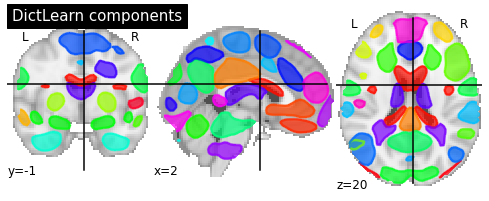

In [7]:
#visualize components on map
plotting.plot_prob_atlas(components_img, view_type='filled_contours',
                         title='DictLearn components')

/home/lussier/.local/lib/python3.6/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


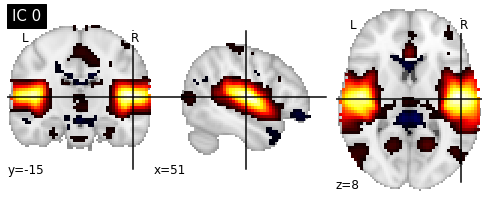

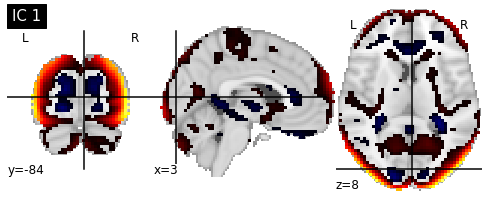

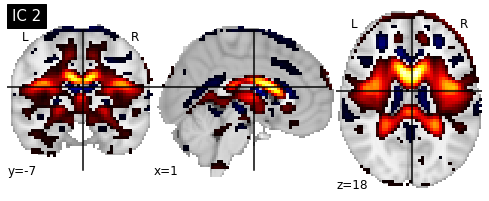

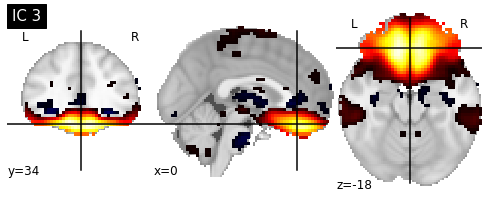

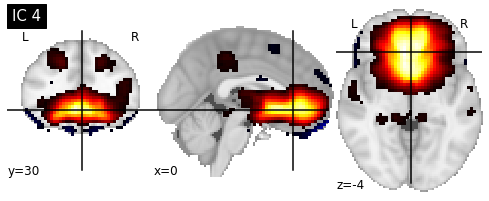

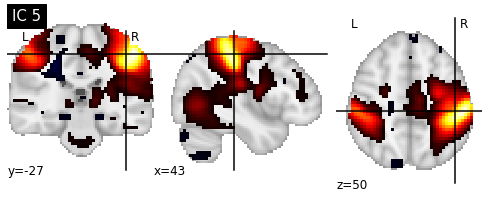

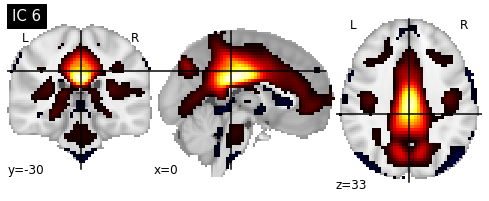

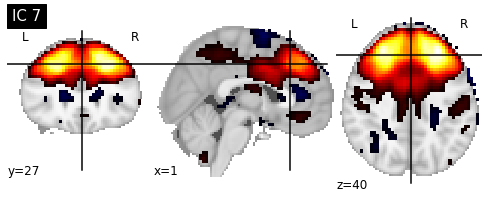

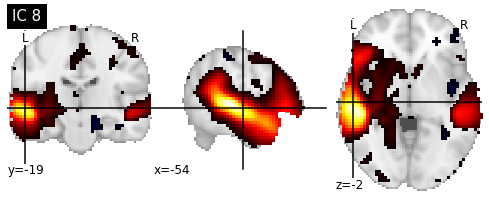

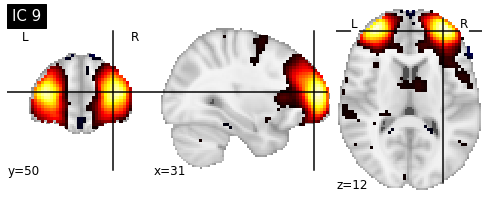

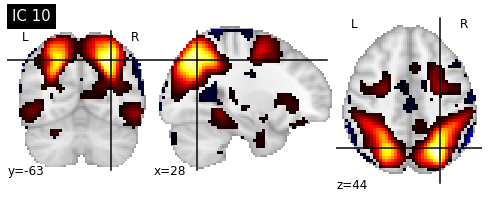

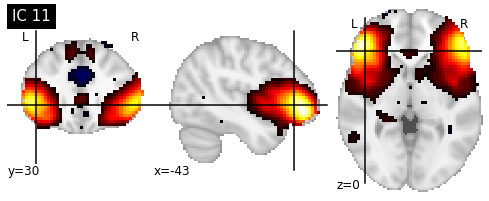

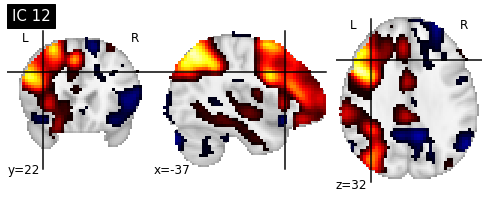

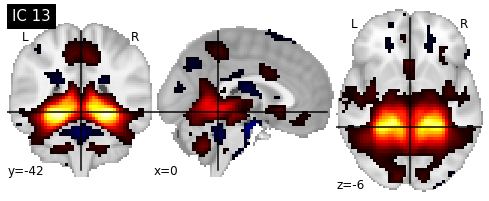

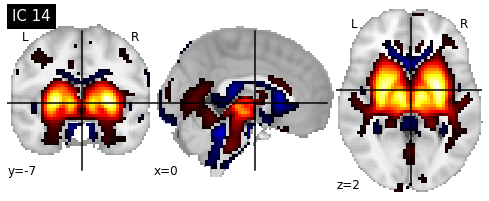

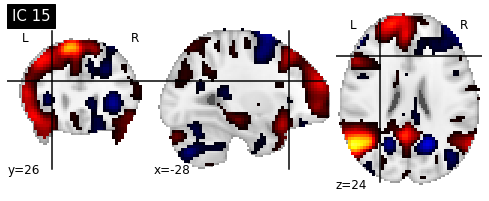

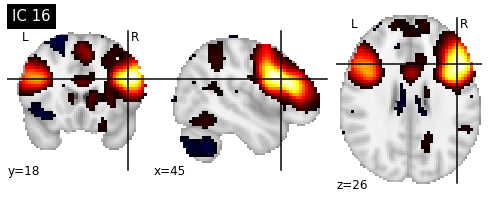

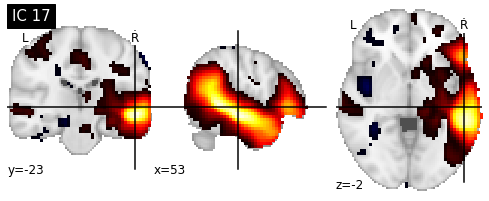

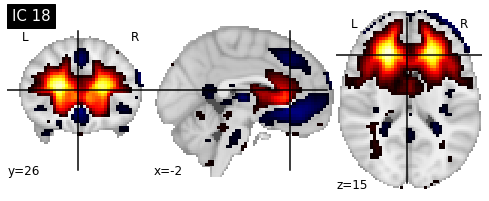

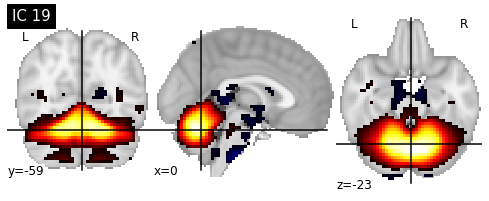

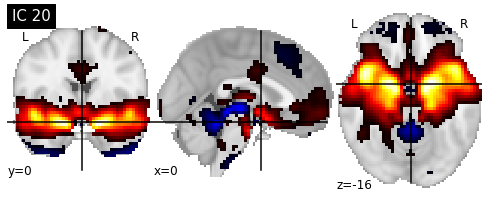

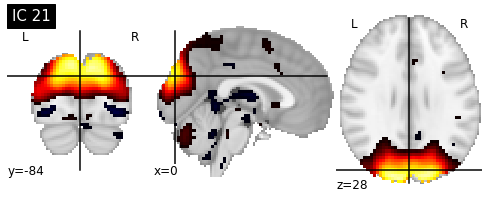

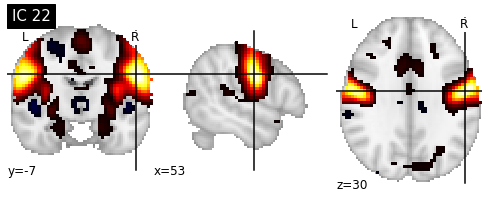

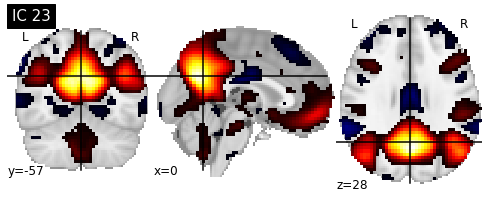

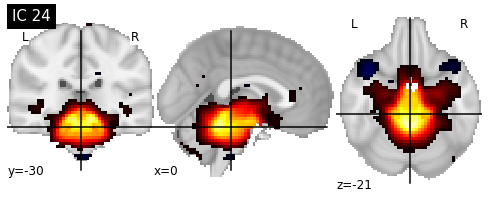

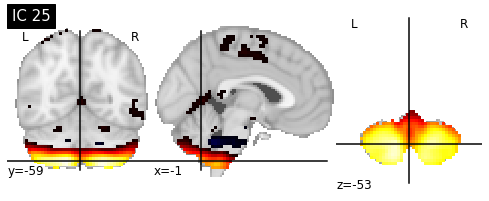

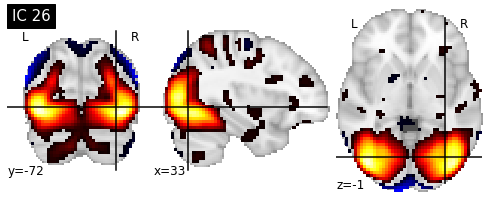

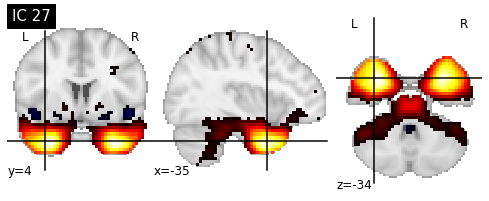

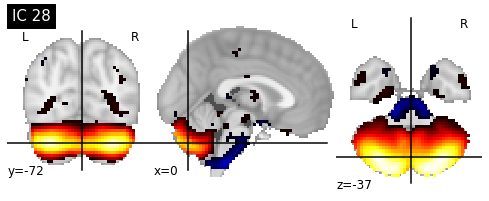

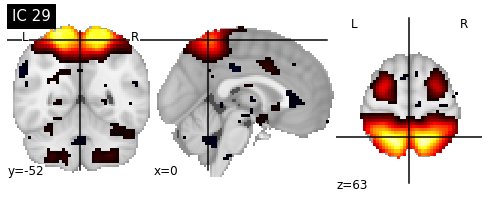

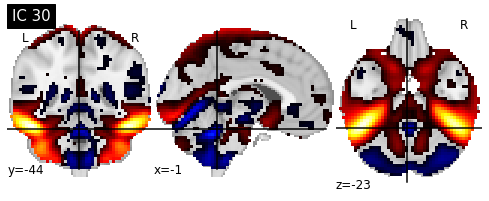

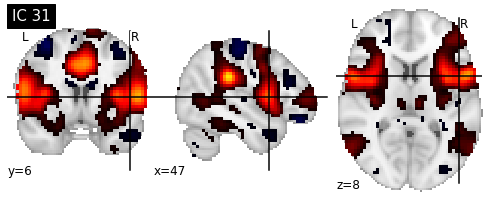

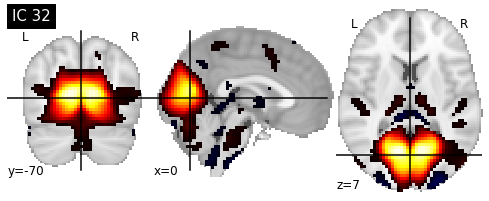

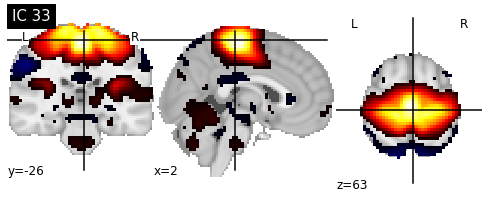

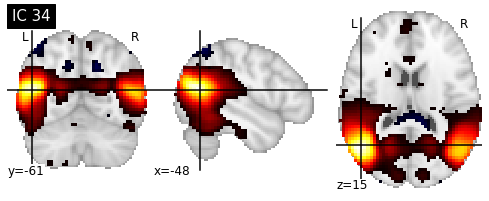

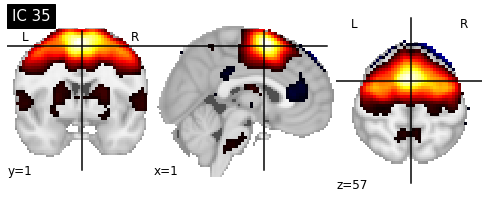

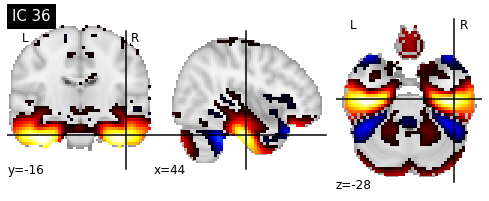

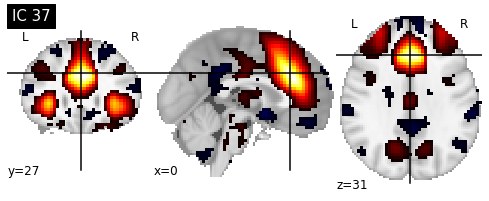

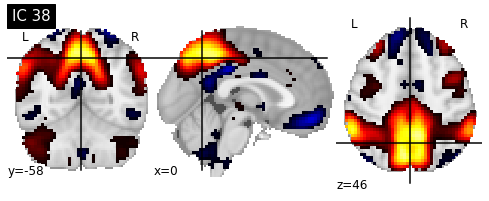

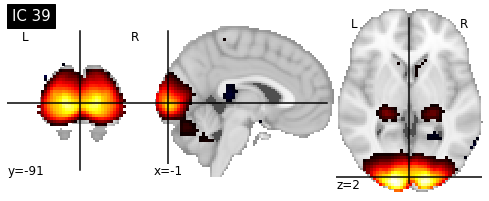

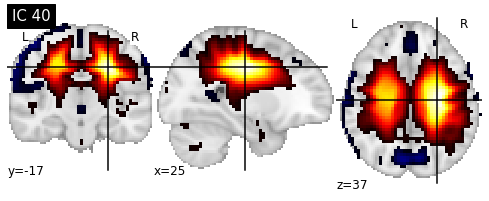

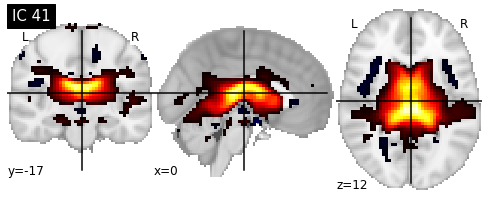

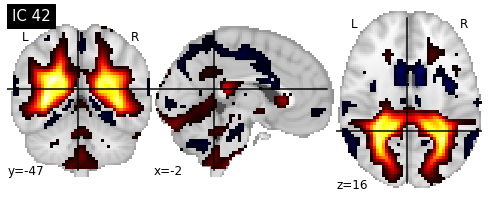

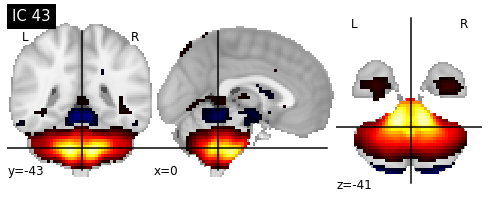

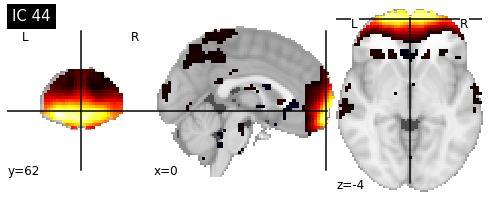

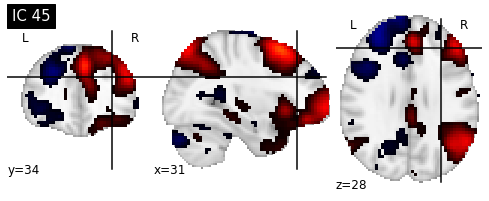

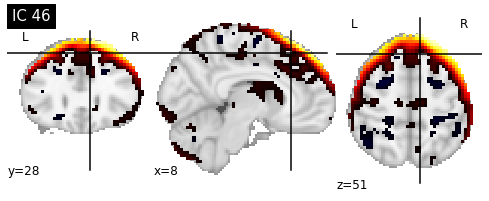

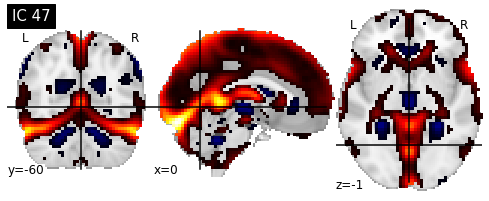

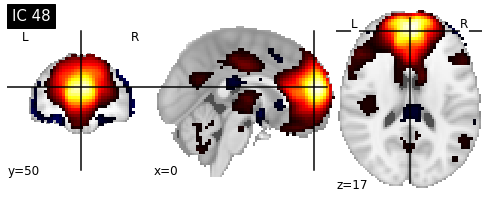

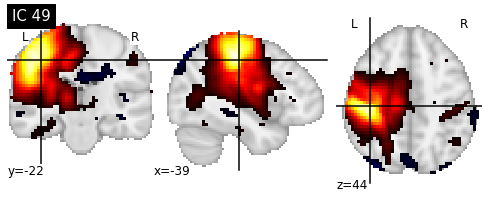

In [8]:
#interate through the components and plot them
for i, cur_img in enumerate(image.iter_img(components_img)):
    plotting.plot_stat_map(cur_img, title="IC %d" % i,
                   colorbar=False)
plotting.show()